#Netflix Data: Cleaning, Analysis and Visualization

This project involves working with a real-world Netflix dataset containing TV shows and movies available on the platform from 2008 to 2021. The goal is to clean the dataset, handle missing or inconsistent values, and perform exploratory data analysis (EDA) to uncover trends in content type, release patterns, countries of origin, ratings, and genres. Visualizations are created to represent these trends clearly using Python libraries like Pandas, Matplotlib, and Seaborn. The project helps build foundational data handling and analysis skills while offering insights into Netflix's global content distribution.

# Objectives of the Analysis
To clean and preprocess the Netflix dataset by handling missing values and duplicates.

To analyze the distribution of content types (Movies vs. TV Shows).

To identify the most common ratings, genres, and countries producing Netflix content.

To explore trends in content addition over the years and months.

To visualize key insights using graphs and charts for better interpretation.

To prepare the cleaned data for potential future machine learning tasks

#Tools Used

* Python
* Pandas, NumPy
* Seaborn, Matplotlib
* Scikit-learn
* SQL
* Excel

IMPORT

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report



UPLOAD AND LOAD DATASET

In [2]:
# Load the dataset
df = pd.read_csv('/content/netflix1.csv')
df.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


DATA CLEANING

In [10]:
#find null values
df.isnull().sum()


,0
show_id,0
type,0
title,0
director,0
country,0
date_added,0
release_year,0
rating,0
duration,0
listed_in,0


In [3]:
# Drop duplicates
df.drop_duplicates(inplace=True)

In [11]:
# Data Preprocessing # Handling missing values
df = df.dropna()


In [13]:
# Convert 'date_added' to datetime
df['date_added'] = pd.to_datetime(df['date_added'])

In [14]:
# Fill missing 'rating' and 'duration' for simplicity
df['rating'] = df['rating'].fillna('Unknown')
df['duration'] = df['duration'].fillna('Unknown')

In [16]:
# Drop unused columns
df.drop(columns=['show_id', 'title'], inplace=True)

In [17]:
# Preview cleaned data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   type          8790 non-null   object        
 1   director      8790 non-null   object        
 2   country       8790 non-null   object        
 3   date_added    8790 non-null   datetime64[ns]
 4   release_year  8790 non-null   int64         
 5   rating        8790 non-null   object        
 6   duration      8790 non-null   object        
 7   listed_in     8790 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(6)
memory usage: 549.5+ KB


FEATURE ENGINEERING FOR ML

In [19]:
# Convert duration to numeric (minutes only for movies)
df['duration_mins'] = df['duration'].str.extract('(\d+)').astype(float)

In [20]:
# Label encode categorical columns
le = LabelEncoder()
df['type'] = le.fit_transform(df['type'])  # Target: 0-TV Show, 1-Movie
df['country'] = le.fit_transform(df['country'])
df['rating'] = le.fit_transform(df['rating'])
df['listed_in'] = le.fit_transform(df['listed_in'])
df['director'] = le.fit_transform(df['director'])

In [21]:

# Drop original 'duration' column
df.drop(columns=['duration'], inplace=True)

In [22]:
# Drop rows with missing numeric values
df.dropna(inplace=True)

TRAIN A ML MODEL

In [34]:
# Extract numerical features from 'date_added'
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month
df['day_added'] = df['date_added'].dt.day

# Drop the original 'date_added' column as it's no longer needed
df.drop(columns=['date_added'], inplace=True)

# Define features and target
X = df.drop(columns=['type'])
y = df['type']

In [24]:
# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [37]:
# Define features and target
X = df.drop(columns=['type'])
y = df['type']

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Logistic Regression
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("Model Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Model Accuracy: 0.997155858930603

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1238
           1       0.99      1.00      1.00       520

    accuracy                           1.00      1758
   macro avg       1.00      1.00      1.00      1758
weighted avg       1.00      1.00      1.00      1758



NETFLIX VISUALIZATION

1. Distribution of Content by Type

/tmp/ipython-input-38-1864609997.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=type_counts.index, y=type_counts.values, palette='Set2')


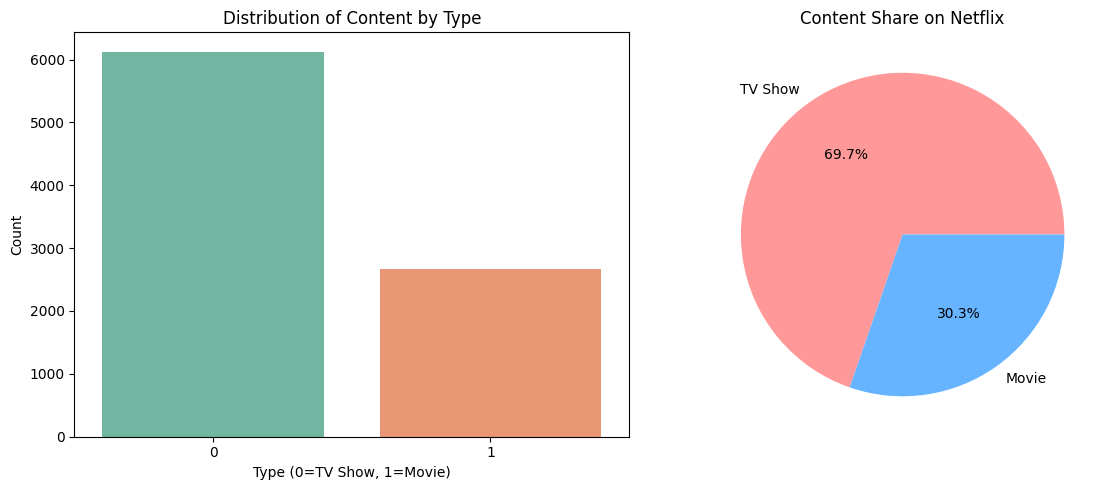

In [38]:
# Countplot and Pie Chart for TV Shows vs Movies
type_counts = df['type'].value_counts()
plt.figure(figsize=(12, 5))

# Barplot
plt.subplot(1, 2, 1)
sns.barplot(x=type_counts.index, y=type_counts.values, palette='Set2')
plt.title("Distribution of Content by Type")
plt.xlabel("Type (0=TV Show, 1=Movie)")
plt.ylabel("Count")

# Pie Chart
plt.subplot(1, 2, 2)
plt.pie(type_counts, labels=['TV Show', 'Movie'], autopct='%.1f%%', colors=['#ff9999','#66b3ff'])
plt.title("Content Share on Netflix")

plt.tight_layout()
plt.show()


2. Rating Distribution

/tmp/ipython-input-39-1401831358.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df['rating'], order=df['rating'].value_counts().index, palette='coolwarm')


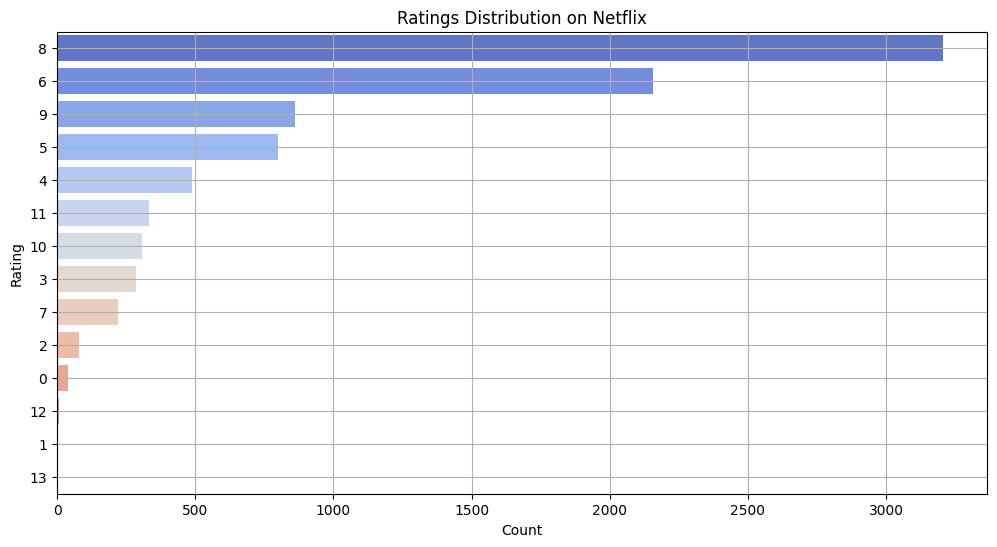

In [39]:
plt.figure(figsize=(12, 6))
sns.countplot(y=df['rating'], order=df['rating'].value_counts().index, palette='coolwarm')
plt.title("Ratings Distribution on Netflix")
plt.xlabel("Count")
plt.ylabel("Rating")
plt.grid(True)
plt.show()


3. Top 10 Countries by Content Count



/tmp/ipython-input-40-3716609973.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette='viridis')


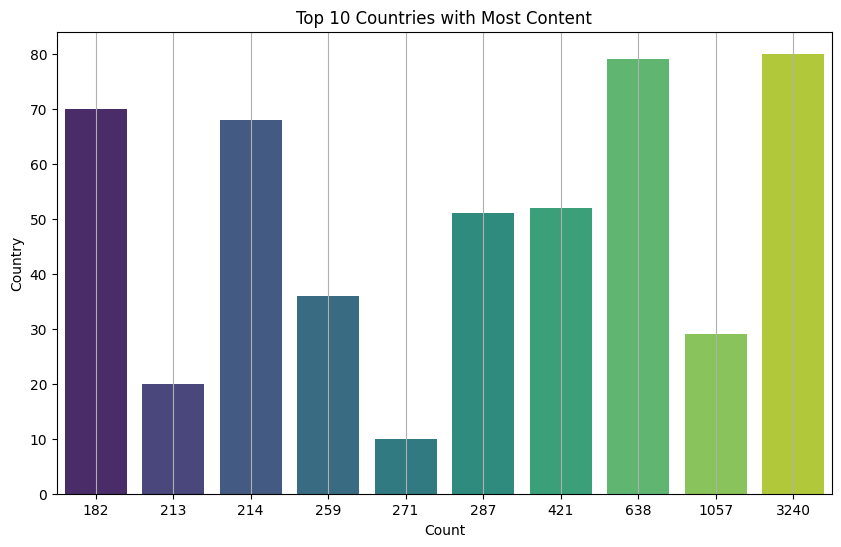

In [40]:
top_countries = df['country'].value_counts().head(10)
plt.figure(figsize=(10,6))
sns.barplot(x=top_countries.values, y=top_countries.index, palette='viridis')
plt.title("Top 10 Countries with Most Content")
plt.xlabel("Count")
plt.ylabel("Country")
plt.grid(axis='x')
plt.show()


4. Content Added Over Time (Year)

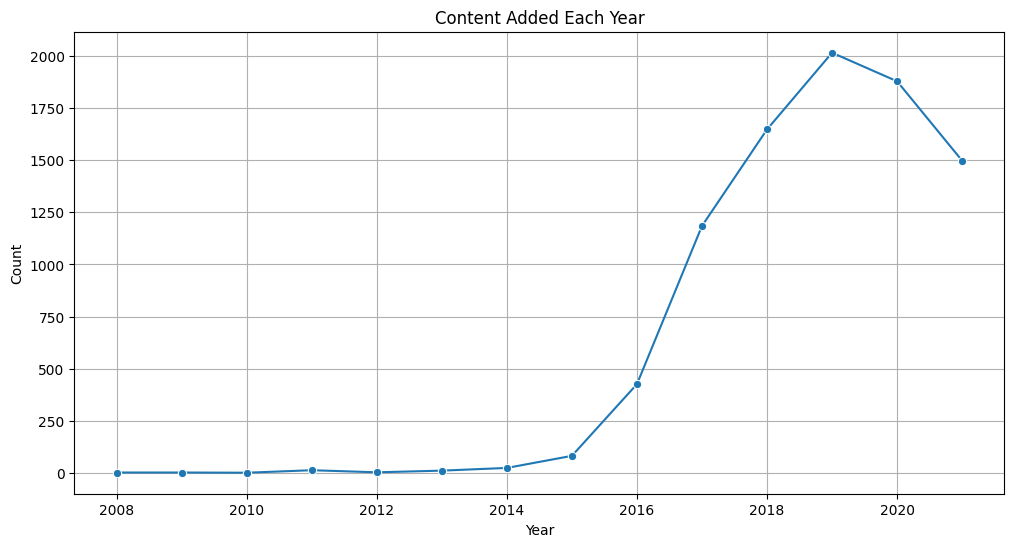

In [42]:
yearly_counts = df['year_added'].value_counts().sort_index()

plt.figure(figsize=(12,6))
sns.lineplot(x=yearly_counts.index, y=yearly_counts.values, marker='o')
plt.title("Content Added Each Year")
plt.xlabel("Year")
plt.ylabel("Count")
plt.grid(True)
plt.show()

5. Monthly Releases: Movies vs TV Shows

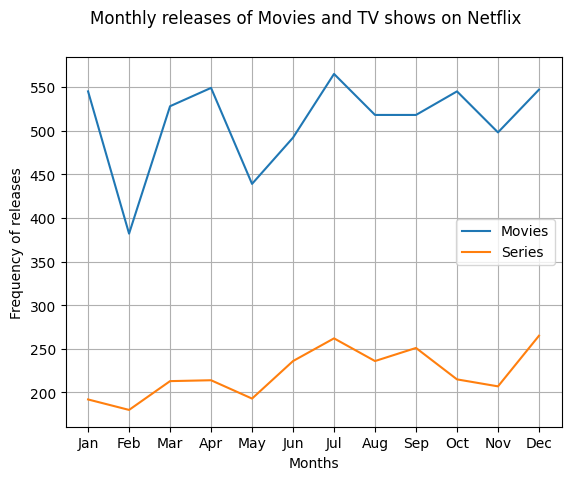

In [46]:
monthly_movie_release = df[df['type'] == 0]['month_added'].value_counts().sort_index()
monthly_series_release = df[df['type'] == 1]['month_added'].value_counts().sort_index()

plt.plot(monthly_movie_release.index, monthly_movie_release.values, label='Movies')
plt.plot(monthly_series_release.index, monthly_series_release.values, label='Series')

plt.xlabel("Months")
plt.ylabel("Frequency of releases")
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend()
plt.grid(True)
plt.suptitle("Monthly releases of Movies and TV shows on Netflix")
plt.show()

6. Top 10 Genres

/tmp/ipython-input-47-1528430619.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_counts.values, y=genre_counts.index, palette='Set3')


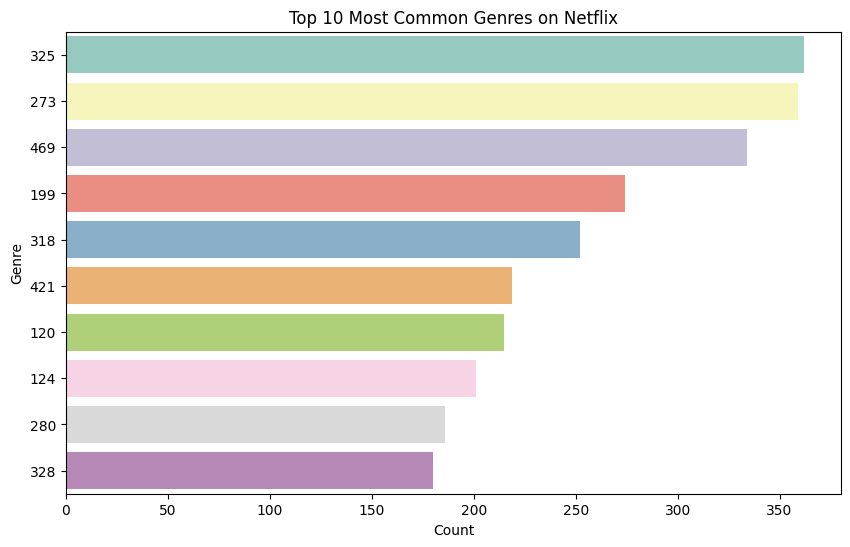

In [47]:
# You may need to reload the original CSV if 'listed_in' was encoded
# For genres, let's split and count
df['genre_list'] = df['listed_in'].astype(str).apply(lambda x: x.split(','))
all_genres = sum(df['genre_list'], [])
genre_counts = pd.Series(all_genres).value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=genre_counts.values, y=genre_counts.index, palette='Set3')
plt.title("Top 10 Most Common Genres on Netflix")
plt.xlabel("Count")
plt.ylabel("Genre")
plt.show()


7. Top 10 Directors by Content Count

/tmp/ipython-input-48-2982820876.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_directors.values, y=top_directors.index, palette='Blues_r')


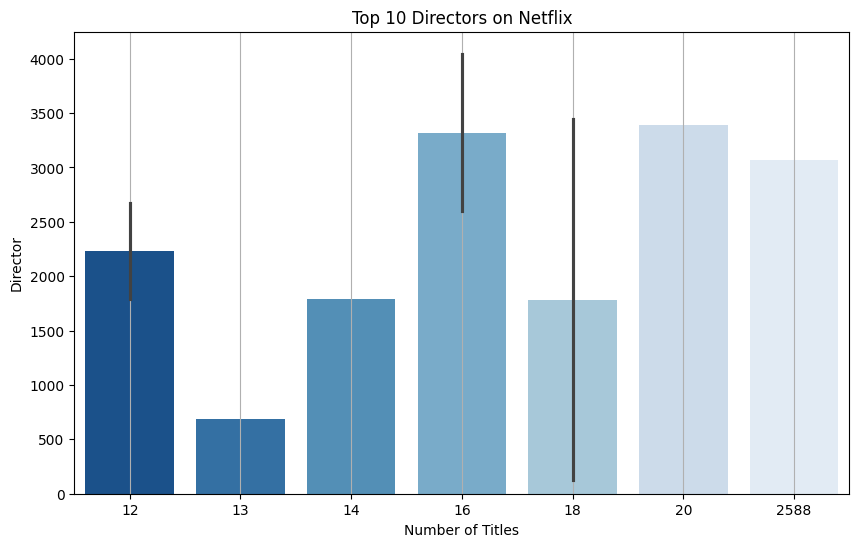

In [48]:
top_directors = df['director'].value_counts().head(10)
plt.figure(figsize=(10,6))
sns.barplot(x=top_directors.values, y=top_directors.index, palette='Blues_r')
plt.title("Top 10 Directors on Netflix")
plt.xlabel("Number of Titles")
plt.ylabel("Director")
plt.grid(axis='x')
plt.show()


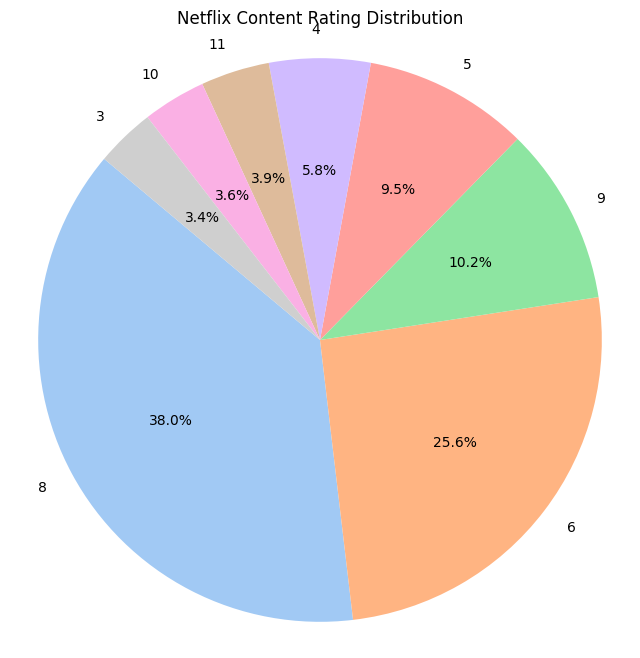

In [52]:

# Group rating counts
rating_counts = df['rating'].value_counts()

# Optional: Limit to top N ratings
top_ratings = rating_counts.head(8)

# Plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(top_ratings.values, labels=top_ratings.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title("Netflix Content Rating Distribution")
plt.axis('equal')  # Equal aspect ratio ensures the pie is a circle
plt.show()


8. Word Cloud of Movie Titles

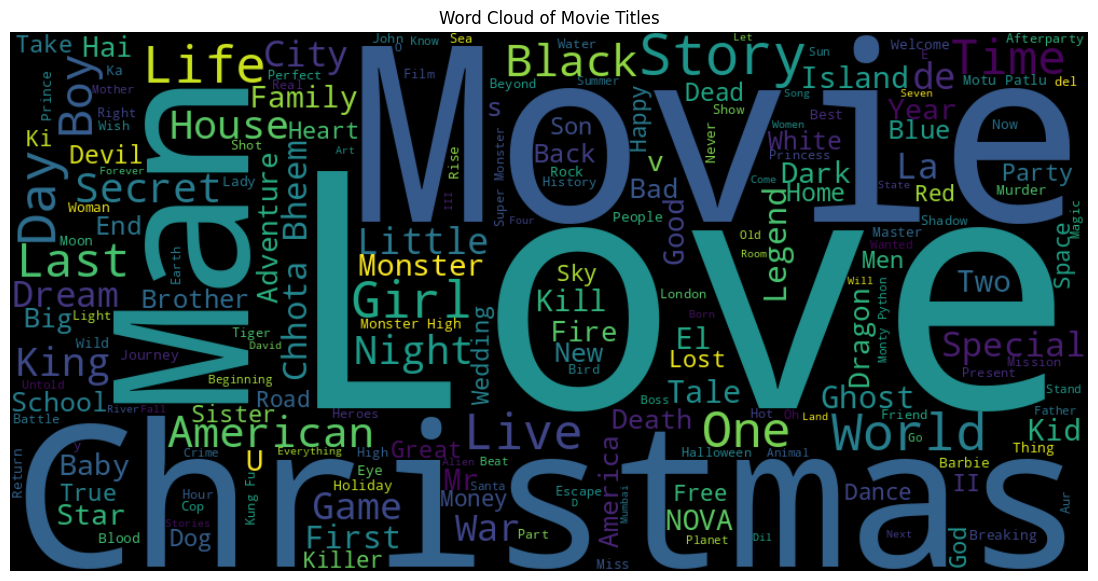

In [51]:
# Reload the original dataset to access the 'title' column
df_original = pd.read_csv('/content/netflix1.csv')

# Filter for movies and get the titles
movie_titles = ' '.join(df_original[df_original['type'] == 'Movie']['title'].dropna().astype(str))

# Generate the word cloud
wordcloud = WordCloud(width=1000, height=500, background_color='black').generate(movie_titles)

plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Movie Titles")
plt.show()